 <h1 align="center">  Zoo Animal Classification   </h1>
    
<br>


<font size=3> <b> PROBLEM STATEMENT : </b>  Predict the Classification of the Animals, Based upon the Variables. </font>
    
    
<font size=3> <b> DATASET REFERENCE : </b>  https://www.kaggle.com/datasets/uciml/zoo-animal-classification </font>
    
    
<font size=3> <b> DESCRIPTION : </b> There are 16 Variables that describes the features of the Animals.  <br><br>  </font>

<center> <b>Dataset Attributes</b> </center> 


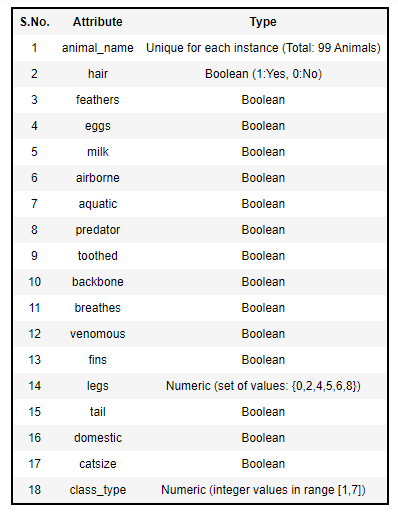

<center> <b >Target (class_type) </b> </center>

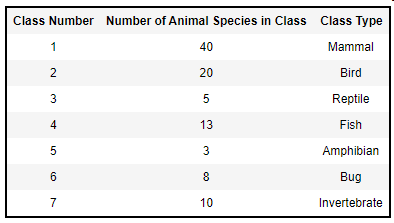

<br>
 <h2 align="center"> DATA EXPLORATION </h2>

### Import the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

### Extract the Data

In [2]:
ZooDataFrame=pd.read_csv('zoo.csv')
ZooDataFrame

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
96,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
97,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
98,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


### DataFrame Information

In [3]:
ZooDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  100 non-null    object
 1   hair         100 non-null    int64 
 2   feathers     100 non-null    int64 
 3   eggs         100 non-null    int64 
 4   milk         100 non-null    int64 
 5   airborne     100 non-null    int64 
 6   aquatic      100 non-null    int64 
 7   predator     100 non-null    int64 
 8   toothed      100 non-null    int64 
 9   backbone     100 non-null    int64 
 10  breathes     100 non-null    int64 
 11  venomous     100 non-null    int64 
 12  fins         100 non-null    int64 
 13  legs         100 non-null    int64 
 14  tail         100 non-null    int64 
 15  domestic     100 non-null    int64 
 16  catsize      100 non-null    int64 
 17  class_type   100 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.2+ KB


### DataFrame Shape, Columns, DataTypes

In [4]:
print(ZooDataFrame.shape)
display(ZooDataFrame.columns)
print(ZooDataFrame.dtypes)

(100, 18)


Index(['animal_name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'class_type'],
      dtype='object')

animal_name    object
hair            int64
feathers        int64
eggs            int64
milk            int64
airborne        int64
aquatic         int64
predator        int64
toothed         int64
backbone        int64
breathes        int64
venomous        int64
fins            int64
legs            int64
tail            int64
domestic        int64
catsize         int64
class_type      int64
dtype: object


## Data Cleansing

### Check for Null values

In [5]:
ZooDataFrame.isnull().sum()

animal_name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
class_type     0
dtype: int64

### Check for Duplicates

In [6]:
ZooDataFrame['animal_name'].duplicated().sum()

1

### Remove the Duplicates

In [7]:
ZooDataFrame.drop_duplicates(subset='animal_name',inplace=True)
ZooDataFrame['animal_name'].duplicated().sum()

0

## Data Wrangling

### Number of Animals that belong to different Class types

In [8]:
Class_types= pd.DataFrame(ZooDataFrame.groupby(['class_type']) ['animal_name'].nunique())
Class_types.columns=['Number of Animals ']
Class_types

,Number of Animals
class_type,
1,40
2,20
3,5
4,13
5,3
6,8
7,10


### Zoo Domestic Animals

In [9]:
Domestic_Animals=ZooDataFrame[ZooDataFrame['domestic']==1]
Domestic_Animals['animal_name'].unique()

array(['calf', 'carp', 'cavy', 'chicken', 'dove', 'goat', 'hamster',
       'honeybee', 'parakeet', 'pony', 'pussycat', 'reindeer'],
      dtype=object)

### Total Animals in the Dataset

In [10]:
print('Total Animals in the Zoo Dataset: ',ZooDataFrame['animal_name'].nunique())
display(ZooDataFrame['animal_name'].unique())

Total Animals in the Zoo Dataset:  99


array(['aardvark', 'antelope', 'bass', 'bear', 'boar', 'buffalo', 'calf',
       'carp', 'catfish', 'cavy', 'cheetah', 'chicken', 'chub', 'clam',
       'crab', 'crayfish', 'crow', 'deer', 'dogfish', 'dolphin', 'dove',
       'duck', 'elephant', 'flamingo', 'flea', 'frog', 'fruitbat',
       'giraffe', 'gnat', 'goat', 'gorilla', 'gull', 'haddock', 'hamster',
       'hare', 'hawk', 'herring', 'honeybee', 'housefly', 'kiwi',
       'ladybird', 'lark', 'leopard', 'lion', 'lobster', 'lynx', 'mink',
       'mole', 'mongoose', 'moth', 'newt', 'octopus', 'opossum', 'oryx',
       'ostrich', 'parakeet', 'penguin', 'pheasant', 'pike', 'piranha',
       'pitviper', 'platypus', 'polecat', 'pony', 'porpoise', 'puma',
       'pussycat', 'raccoon', 'reindeer', 'rhea', 'scorpion', 'seahorse',
       'seal', 'sealion', 'seasnake', 'seawasp', 'skimmer', 'skua',
       'slowworm', 'slug', 'sole', 'sparrow', 'squirrel', 'starfish',
       'stingray', 'swan', 'termite', 'toad', 'tortoise', 'tuatara',
    

### Aquatic Animals

In [11]:
Aquatic_Animals=ZooDataFrame[ZooDataFrame['aquatic']==1]
print('Aquatic Animals: ',Aquatic_Animals['animal_name'].nunique())
display(Aquatic_Animals['animal_name'].unique())

Aquatic Animals:  35


array(['bass', 'carp', 'catfish', 'chub', 'crab', 'crayfish', 'dogfish',
       'dolphin', 'duck', 'frog', 'gull', 'haddock', 'herring', 'lobster',
       'mink', 'newt', 'octopus', 'penguin', 'pike', 'piranha',
       'platypus', 'porpoise', 'seahorse', 'seal', 'sealion', 'seasnake',
       'seawasp', 'skimmer', 'skua', 'sole', 'starfish', 'stingray',
       'swan', 'toad', 'tuna'], dtype=object)

### Predators

In [12]:
Predators=ZooDataFrame[ZooDataFrame['predator']==1]
print('Predators: ', Predators['animal_name'].nunique())
display(Predators['animal_name'].unique())

Predators:  54


array(['aardvark', 'bass', 'bear', 'boar', 'catfish', 'cheetah', 'chub',
       'clam', 'crab', 'crayfish', 'crow', 'dogfish', 'dolphin', 'frog',
       'gull', 'hawk', 'herring', 'kiwi', 'ladybird', 'leopard', 'lion',
       'lobster', 'lynx', 'mink', 'mole', 'mongoose', 'newt', 'octopus',
       'opossum', 'penguin', 'pike', 'piranha', 'pitviper', 'platypus',
       'polecat', 'porpoise', 'puma', 'pussycat', 'raccoon', 'rhea',
       'scorpion', 'seal', 'sealion', 'seasnake', 'seawasp', 'skimmer',
       'skua', 'slowworm', 'starfish', 'stingray', 'tuatara', 'tuna',
       'vulture', 'wolf'], dtype=object)

## Descriptive Statistics

### Descriptive Statistics Information of the Numerical columns

In [13]:
ZooDataFrame.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,0.424242,0.202020,0.585859,0.404040,0.242424,0.353535,0.545455,0.595960,0.818182,0.787879,0.080808,0.171717,2.838384,0.757576,0.121212,0.434343,2.828283
std,0.496743,0.403551,0.495080,0.493203,0.430730,0.480500,0.500464,0.493203,0.387657,0.410891,0.273927,0.379054,2.048927,0.430730,0.328035,0.498193,2.104613
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


### Correlation

In [14]:
ZooDataFrame[['hair','domestic']].corr()

,hair,domestic
hair,1.000000,0.182171
domestic,0.182171,1.000000


### Covariance

In [15]:
ZooDataFrame[['class_type','domestic']].cov()

,class_type,domestic
class_type,4.429396,-0.111626
domestic,-0.111626,0.107607


### Mean

In [16]:
ZooDataFrame.mean()

hair          0.424242
feathers      0.202020
eggs          0.585859
milk          0.404040
airborne      0.242424
aquatic       0.353535
predator      0.545455
toothed       0.595960
backbone      0.818182
breathes      0.787879
venomous      0.080808
fins          0.171717
legs          2.838384
tail          0.757576
domestic      0.121212
catsize       0.434343
class_type    2.828283
dtype: float64

## Data Visualization

### Number of Animals in Each Class

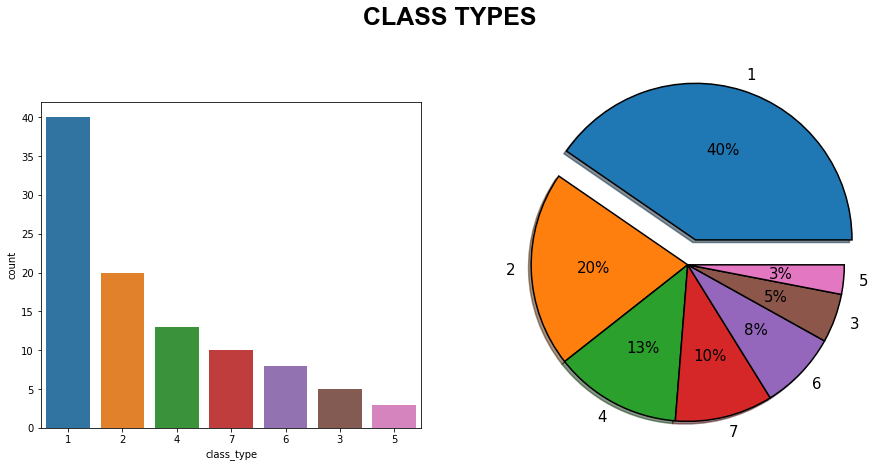

In [17]:
#Creating Seaborn Countplot
fig, ax=plt.subplots(1, 2, figsize=(15,6))
Countplot= sns.countplot(x='class_type', data=ZooDataFrame, ax=ax[0],
                         order = ZooDataFrame['class_type'].value_counts().index)

#Creating Matplotlib PieChart
explode = [0.2,0,0,0,0,0,0] 
Piechart=ZooDataFrame['class_type'].value_counts(sort=True).plot.pie(autopct="%.0f%%",ax=ax[1], 
                                                            shadow=True,explode=explode,radius=1.2,
                                                            textprops = {'color': 'black','fontsize':15},
                                                            wedgeprops = {'linewidth':1.5,'edgecolor' : "black"}) 
plt.ylabel(' ')

# Title 
plt.suptitle(" CLASS TYPES", y=1.1, fontsize=25, fontweight='bold',family='Arial')

# Show plot
plt.show()

<font size=3> 
    <center> 
        <b>Observation:</b> Class Type 1- Mammals is in Majority while  Class Type 5- Amphibians  is the Minority             </center> 
</font>
<br>

### Animals Vs Class Types 

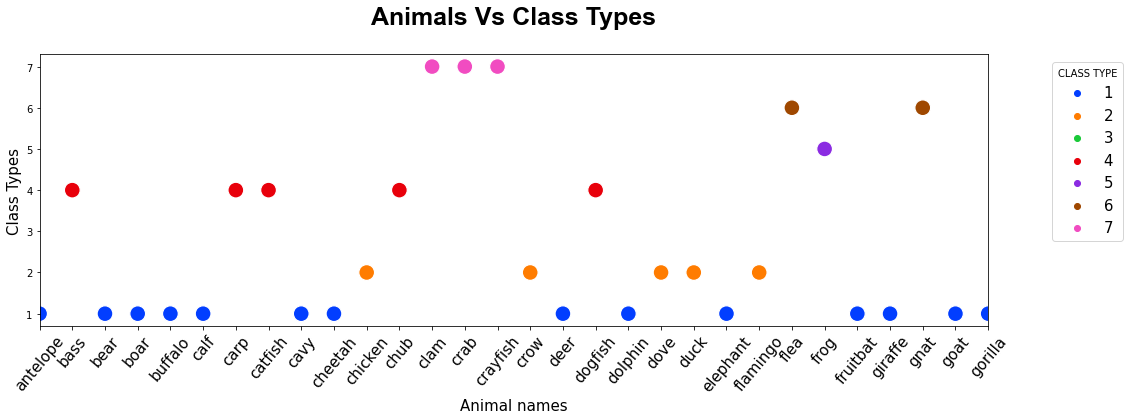

In [18]:
# Creating Figure size
plt.figure(figsize=(17,5))

# Creating Scatterplot
sns.scatterplot(x=ZooDataFrame['animal_name'],y=ZooDataFrame['class_type'],
                hue=ZooDataFrame['class_type'], palette='bright',s=250)

# Title
plt.title("Animals Vs Class Types",fontsize=25, fontweight='bold',family='Arial',pad=30)

# Legend 
plt.legend(loc='upper right', title='CLASS TYPE', bbox_to_anchor =(1.15, 1),fontsize=15)

# X-Axis and Y-Axis Labels
plt.xlabel("Animal names",fontsize=15)
plt.ylabel("Class Types",fontsize=15)

# X-Axis ticks
plt.xticks(rotation=50,fontsize=15)

# X-Axis Limits
plt.xlim(1,30)

# show plot
plt.show()

### Visualizing the distibution of the data for every feature

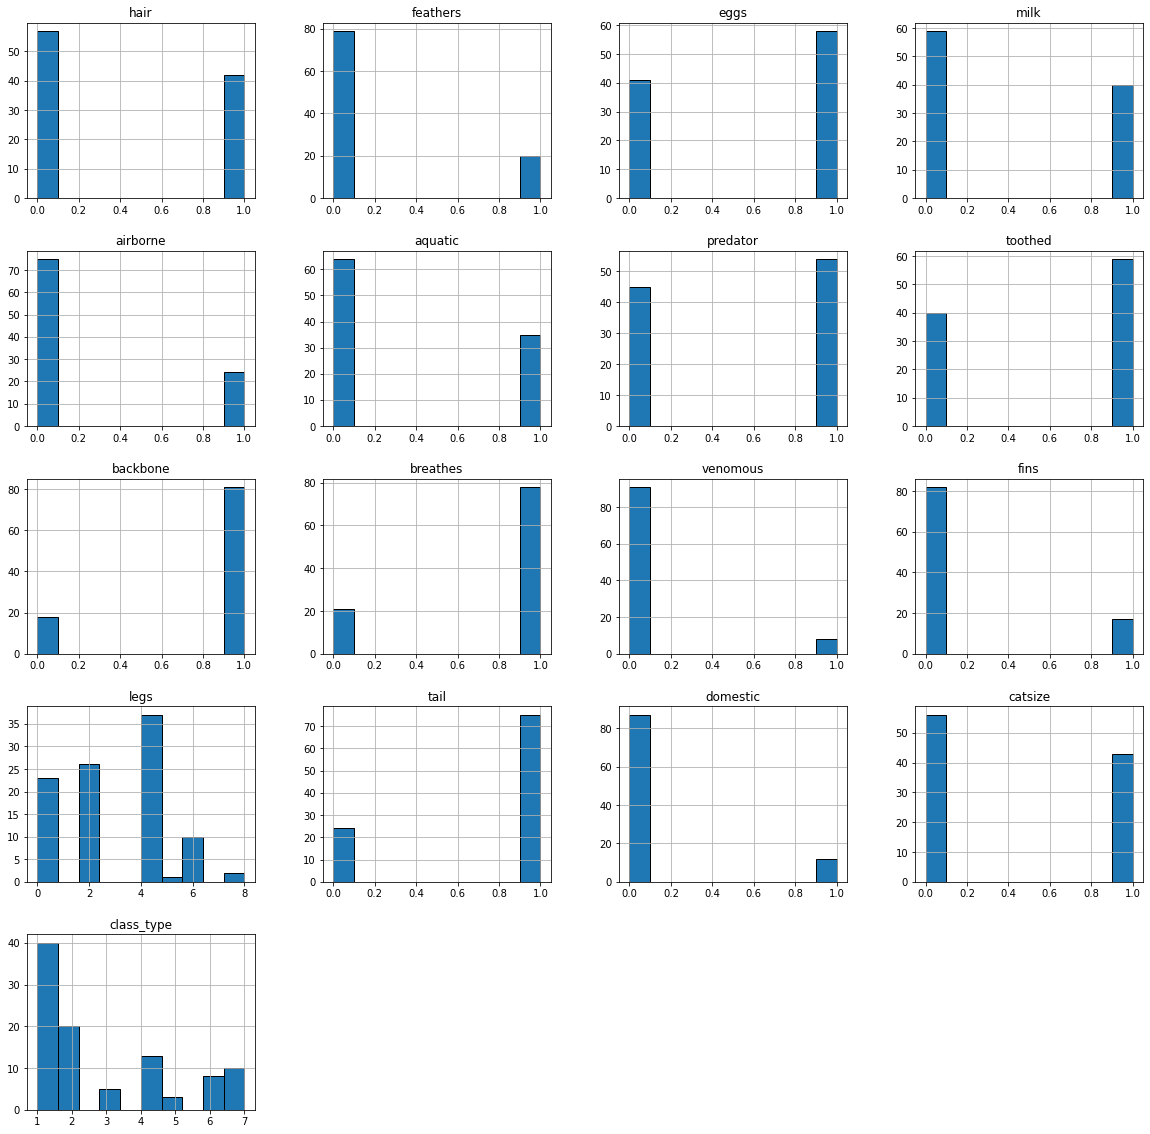

In [19]:
#Creating Histogram
ZooDataFrame.hist(edgecolor='black', figsize=(20,20))

# Show plot
plt.show()

<br>
 <h2 align="center"> BUILD THE MODEL </h2>

### Let us consider x as Features array and y as Target values.

In [20]:
x=ZooDataFrame.drop(['animal_name','class_type'], axis=1).values
y=ZooDataFrame['class_type'].values
print(x,y)

[[1 0 0 ... 0 0 1]
 [1 0 0 ... 1 0 1]
 [0 0 1 ... 1 0 0]
 ...
 [1 0 0 ... 1 0 1]
 [0 0 1 ... 0 0 0]
 [0 1 1 ... 1 0 0]] [1 1 4 1 1 1 1 4 4 1 1 2 4 7 7 7 2 1 4 1 2 2 1 2 6 5 1 1 6 1 1 2 4 1 1 2 4
 6 6 2 6 2 1 1 7 1 1 1 1 6 5 7 1 1 2 2 2 2 4 4 3 1 1 1 1 1 1 1 1 2 7 4 1 1
 3 7 2 2 3 7 4 2 1 7 4 2 6 5 3 3 4 1 1 2 1 6 1 7 2]



<br>
<font size=3><b> Train Test Split Method : </b> </font><br>

1. A technique for evaluating the performance of a machine learning algorithm. 

2. The procedure involves taking a dataset and dividing it into two subsets. 

3. The first subset is used to fit the model and is referred to as the training dataset. The second subset is not used to train the model; instead, the input element of the dataset is provided to the model, then predictions are made and compared to the expected values. This second dataset is referred to as the test dataset.


<b>Train Dataset:</b> Used to fit the machine learning model. <br>
<b>Test Dataset:</b> Used to evaluate the fit machine learning model.
<br>


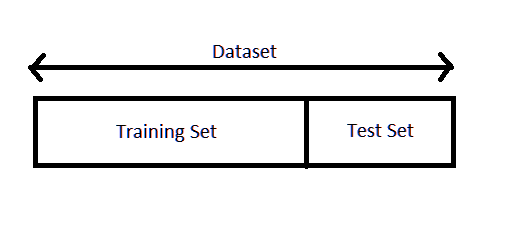

### Apply the train test split method

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=2)

## Classification Models

#### Let us consider the following classification models for our Dataset 

1. <b> DecisionTreeClassifier(): </b> The decision tree classifier creates the classification model by building a decision tree. Each node in the tree specifies a test on an attribute, each branch descending from that node corresponds to one of the possible values for that attribute.


2. <b> RandomForestClassifier(): </b> A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. 


3. <b> SVC(kernel='linear'): </b> The objective of a Linear SVC (Support Vector Classifier) is to fit to the data that we provide, returning a "best fit" hyperplane that divides, or categorizes our data. 


4. <b> GaussianNB(): </b> Naive Bayes methods are a set of supervised learning algorithms based on applying Bayes’ theorem with the “naive” assumption of conditional independence between every pair of features given the value of the class variable. Naive Bayes learners and classifiers can be extremely fast compared to more sophisticated methods.


5. <b> GradientBoostingClassifier(): </b>  Gradient boosting classifiers are a group of machine learning algorithms that combine many weak learning models together to create a strong predictive model. Decision trees are usually used when doing gradient boosting. Boosting is a general ensemble technique that involves sequentially adding models to the ensemble where subsequent models correct the performance of prior models.

### Import the Libraries and create a model list

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier

MODEL_LIST=[DecisionTreeClassifier(random_state=2),
            RandomForestClassifier(random_state=2,n_estimators=25),
            SVC(kernel='linear'),
            GaussianNB(),
            GradientBoostingClassifier(n_estimators=30,random_state=2)]

### Calculate Score and Time for each Model

In [23]:
import time

#Created a Dictionary to store the score for each model
Score_List={}

#Created a List to store the time taken to build each model
Time_Build=[]

# Created a List to store the time taken to predict each model
Time_Predict=[]

# Calculate score and time
for model in MODEL_LIST:
    #Calculate Time taken to build the model
    start_build = time.time()
    model.fit(x_train,y_train)
    end_build=time.time()
    Time_Build.append(round((end_build-start_build)*1000,2))
    Score_List[model]=model.score(x_test,y_test)*100    
   
    # Now Calculate Time taken to predict
    start_predict = time.time()
    y_predict=model.predict(x_test)
    end_predict=time.time() 
    Time_Predict.append(round((end_predict-start_predict)*1000,2)) 

#Created a Dictionary for Model names, scores and Time Taken
ScoreTimeDict={'Model_Name': list(map(str, MODEL_LIST)), 'Score':Score_List.values(),
               'Build_Time_in_Milliseconds':Time_Build,'Predict_Time_in_Milliseconds':Time_Predict}

#Created a Data Frame
ScoreTimeDataFrame=pd.DataFrame(ScoreTimeDict, index=range(1,6))

#Converting the Column Datatypes
ScoreTimeDataFrame=ScoreTimeDataFrame.convert_dtypes()

#Calculate the Total Time taken
ScoreTimeDataFrame['Total_Time_Milliseconds']=round(ScoreTimeDataFrame['Build_Time_in_Milliseconds']+ScoreTimeDataFrame['Predict_Time_in_Milliseconds'],2)

#Print the DataFrame
ScoreTimeDataFrame

,Model_Name,Score,Build_Time_in_Milliseconds,Predict_Time_in_Milliseconds,Total_Time_Milliseconds
1,DecisionTreeClassifier(random_state=2),100,1.98,0,1.98
2,"RandomForestClassifier(n_estimators=25, random...",100,61.0,5,66.0
3,SVC(kernel='linear'),100,2.0,1,3.0
4,GaussianNB(),96,1.0,1,2.0
5,"GradientBoostingClassifier(n_estimators=30, ra...",100,226.0,1,227.0


### Plot a Graph for the scores and time taken by each model

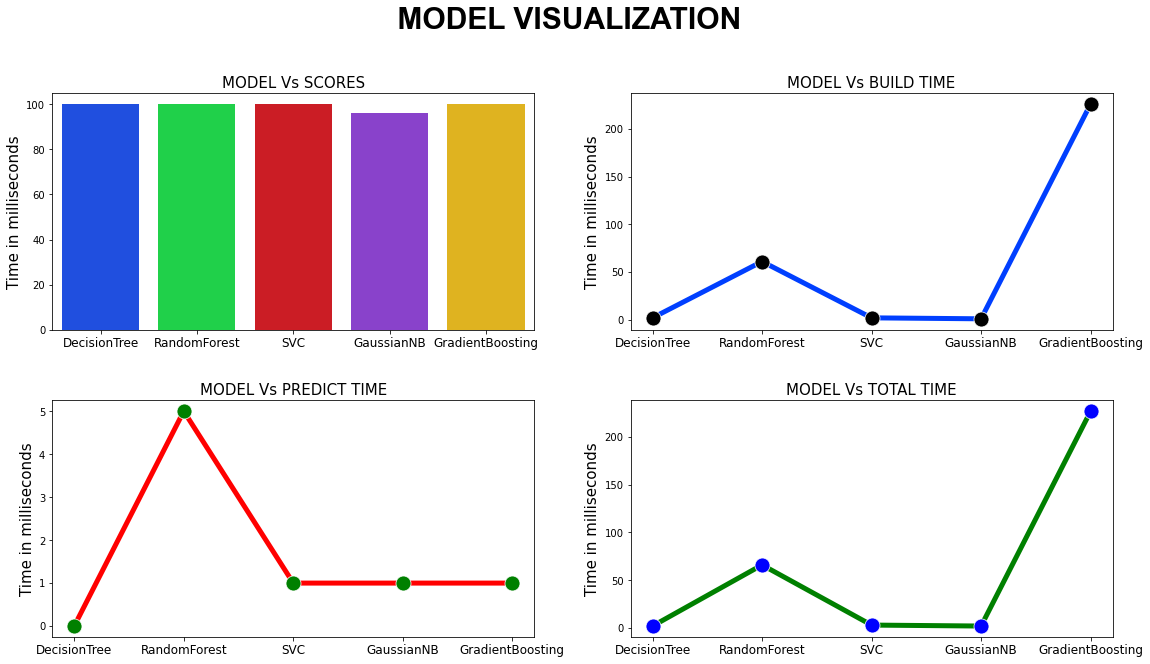

In [24]:
#Created a Bargraph that represents the scores and lineplot that represents Total Time taken by the models

plt.style.use('seaborn-bright')

#Create Subplots with 2 rows and 2 columns
fig, ax= plt.subplots(2,2, figsize=(19,10))

# set the spacing between subplots
plt.subplots_adjust(wspace=0.2, hspace=0.3)

#Title
fig.suptitle(" MODEL VISUALIZATION", y=1, fontsize=30, fontweight='bold',family='Arial')

#Create Subplots

#Create barplot for MODEL Vs Score
Graph1=sns.barplot(y=ScoreTimeDataFrame['Score'],x=ScoreTimeDataFrame['Model_Name'],ax=ax[0,0])
ax[0,0].set_title('MODEL Vs SCORES',fontsize=15)

#Create lineplot for MODEL Vs BUILD TIME
Graph2=sns.lineplot(ScoreTimeDataFrame['Model_Name'],ScoreTimeDataFrame['Build_Time_in_Milliseconds'],
                    linewidth=5, ax=ax[0,1],marker="o",mfc="black",ms=15)
ax[0,1].set_title("MODEL Vs BUILD TIME",fontsize=15)

#Create lineplot for MODEL Vs PREDICT TIME
Graph3=sns.lineplot(ScoreTimeDataFrame['Model_Name'],ScoreTimeDataFrame['Predict_Time_in_Milliseconds'],
                    linewidth=5,ax=ax[1,0],color="red",marker="o",mfc="green",ms=15)
ax[1,0].set_title("MODEL Vs PREDICT TIME",fontsize=15)

#Create lineplot for MODEL Vs TOTAL TIME
Graph4=sns.lineplot(ScoreTimeDataFrame['Model_Name'],ScoreTimeDataFrame['Total_Time_Milliseconds'],
                    linewidth=5,ax=ax[1,1],color="green",marker="o",mfc="blue",ms=15)
ax[1,1].set_title("MODEL Vs TOTAL TIME",fontsize=15)

# Create a list to edit all the graphs at a time
Graphs=[Graph1,Graph2,Graph3,Graph4]

# For loop- to customize all the graphs at a time
for grph in Graphs:
    grph.set_xticklabels(['DecisionTree','RandomForest','SVC','GaussianNB','GradientBoosting'])
    grph.set(xlabel=None)
    grph.set_ylabel("Time in milliseconds", fontsize=15)
    grph.tick_params(axis='x', labelsize=12)
    
# Show the plots
plt.show()

<br>
 <h2 align="center"> MODEL SELECTION </h2>

### From the above table and graphs, it is clear that we have four models with 100% accuracy.
### Let us select 'DecisionTreeClassifier()' (Accuracy:100%, Less Time )

In [25]:
# Building the model
MODEL=DecisionTreeClassifier(random_state=2)
MODEL.fit(x_train,y_train)

# Evaluating the model
MODEL.score(x_test,y_test)*100

100.0

## Classification Report 
1. Build a text report showing the main classification metrics.
2. It is a performance evaluation metric in machine learning which is used to show the precision, recall, F1 Score, and support score of the trained classification model

### Print the Classification Report

In [26]:
from sklearn.metrics import classification_report
y_predict=MODEL.predict(x_test)
performance_report=classification_report(y_test, y_predict)
print(performance_report)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         4

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25



## Confusion Matrix
1.  A tabular summary of the number of correct and incorrect predictions made by a classifier. 
2. It can be used to evaluate the performance of a classification model through the calculation of performance metrics like accuracy, precision, recall, and F1-score.

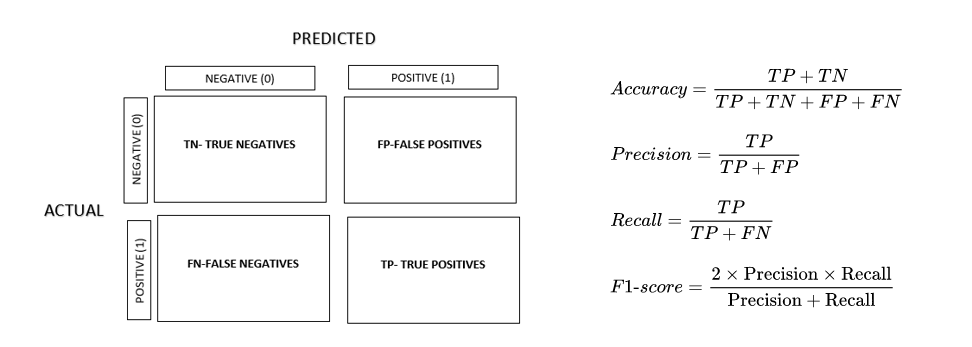

### Plot the Confusion Matrix

[[8 0 0 0 0 0]
 [0 8 0 0 0 0]
 [0 0 2 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 0 2 0]
 [0 0 0 0 0 4]] 



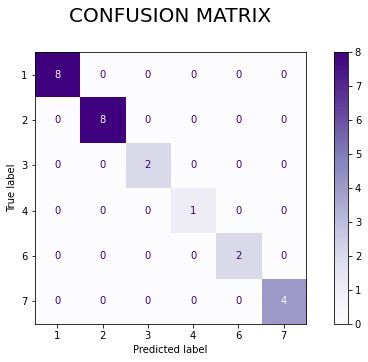

In [27]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
print(confusion_matrix(y_test, y_predict),"\n")
fig,ax=plt.subplots(figsize=(10, 5))
plot_confusion_matrix(MODEL,x_test,y_test,cmap="Purples", ax=ax)
plt.title("CONFUSION MATRIX",fontsize='20', pad=30)
plt.grid(False)
plt.show()

### Actual Vs Predicted Values

In [28]:
print("Actual: ",len(y_test))
print("Predicted: ",(y_predict==y_test).sum())

Actual:  25
Predicted:  25


### Predicted Values DataFrame

In [29]:
predicted=pd.DataFrame({'Actual':y_test,'Predicted':y_predict})
predicted

,Actual,Predicted
0,2,2
1,1,1
2,2,2
3,6,6
4,2,2
5,2,2
6,4,4
7,1,1
8,6,6
9,7,7


### Actual and Predicted Values Table

In [30]:
Actual_Predicted=pd.crosstab(predicted['Actual'],predicted['Predicted'])
Actual_Predicted

Predicted,1,2,3,4,6,7
Actual,,,,,,
1,8,0,0,0,0,0
2,0,8,0,0,0,0
3,0,0,2,0,0,0
4,0,0,0,1,0,0
6,0,0,0,0,2,0
7,0,0,0,0,0,4


### Plot Decision Tree

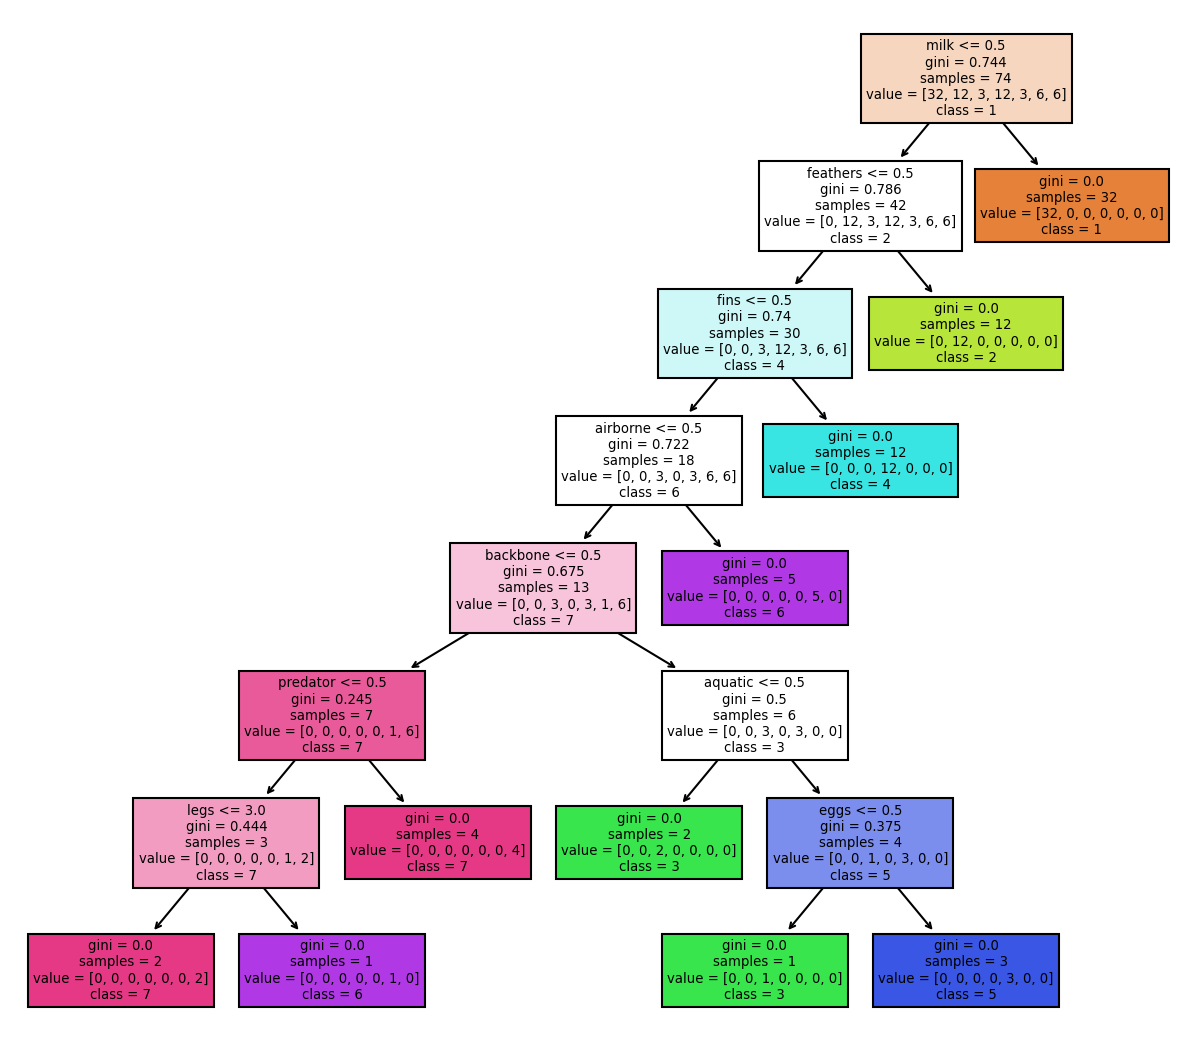

In [31]:
Features=['hair', 'feathers', 'eggs', 'milk', 'airborne',
          'aquatic', 'predator', 'toothed', 'backbone', 
          'breathes', 'venomous','fins', 'legs', 'tail', 
          'domestic', 'catsize']
Class=['1','2','3','4','5','6','7']

from sklearn import tree
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(10,9),dpi=150)
tree.plot_tree(MODEL,feature_names=Features,class_names=Class,filled=True)
plt.show()

### Install dtreeviz
1. Install the latest Windows/Ubuntu Graphviz
<ul> <li> <a href="https://graphviz.org/download/"> https://graphviz.org/download/ </a></ul>
<br>

2. Type the below command in Anaconda Powershell Prompt
   <ul> <li> conda install graphviz python-graphviz  </ul> 
   <ul> <li>  pip install dtreeviz </ul> <br>

3. Set the Windows Graphiz Path from Jupyter Notebook
 <ul> <li> import os
      <li> os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'  </ul>

### Plot Decision Tree using dtreeviz Package

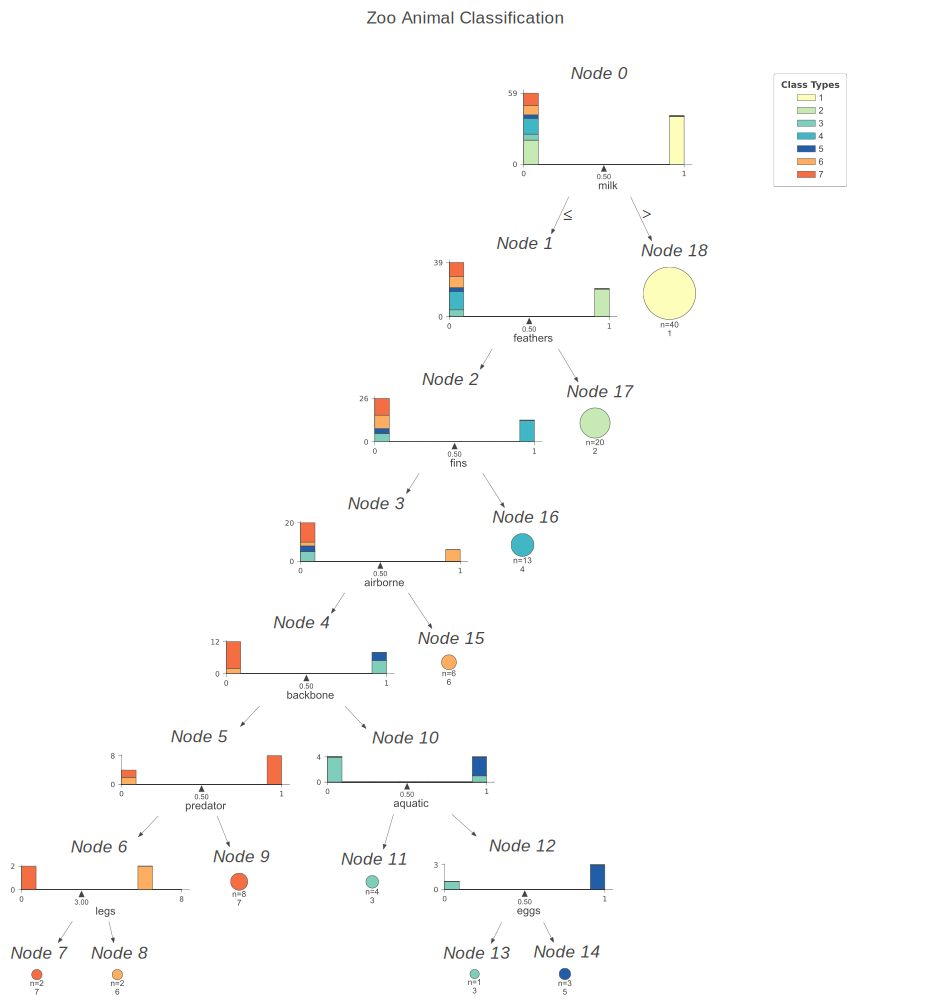

In [32]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'

from dtreeviz.trees import dtreeviz 
DecisionTreeVisualization = dtreeviz(MODEL, x, y,
                                        target_name="Class Types",
                                        feature_names=Features,
                                        class_names=Class,
                                        title="Zoo Animal Classification",
                                        scale=1.22, show_node_labels = True)

DecisionTreeVisualization.view()  # To view in the browser
DecisionTreeVisualization

### 

<br>
 <h2 align="center"> CONCLUSION </h2>

<b>MODEL SELECTED:</b> DecisionTreeClassifier()

<b>Advantages and Disadvantages of the DecisionTreeClassifier model:</b>


<b>Advantages:</b>

1. No considerable impact of missing values.

2. Easy to explain to non-technical team members.

3. Easy visualization

4. Automatic Feature selection: Irrelevant features won’t affect decision trees.


<b>Disadvantages:</b>

1. Prone to overfitting. Good performance on the training data, poor generalization to new data.

2. Sensitive to data. If data changes slightly, the outcomes can change to a very large extent.

3. Higher time required to train decision trees of large datasets.



<b>Applications:</b>

Identifying buyers for products, finding strategy that can maximize the profit, finding strategy for cost minimization, which features are most important to attract and retain customers (is it the frequency of shopping, is it the frequent discounts, is it the product mix), fault diagnosis in machines (keep measuring pressure, vibrations and other measures and predict before a fault occurs) and many other applications.

The Best Machine learning models for the Zoo dataset are <b> DecisionTreeClassifier, RandomForestClassifier, SVC and GradientBoostingClassifier.</b>
